 # How to use radon.py

In [1]:
import torch
import matplotlib.pyplot as plt
import radon_transformation.radon as radon

# install scikit-image
!{sys.executable} -m pip install scikit-image

# for dataset
from skimage.data import shepp_logan_phantom

### Load Data

First load your data. In this example we simulate a dataset with batchsize 5. The device can be either "cpu" or "cuda". Please be away that calculations ont he gpu are much faster than on cpu.

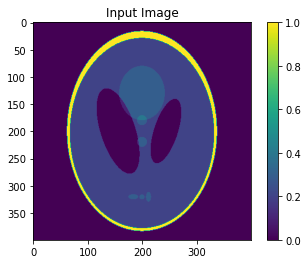

In [2]:
device = "cuda"
batchsize = 5

# load example image
image = shepp_logan_phantom()

# transform to tensor and simulate a dataset with batchsize 5
image = torch.tensor(image).float().to(device)
image = image[None, None].repeat(batchsize, 1, 1, 1)

plt.imshow(image[0,0].cpu())
plt.colorbar()
plt.title("Input Image")
plt.show()

### Apply Radon Transformation and FBP

Apply radon trasnformation and filtered backprojection. You can change the number of projection angles by changing the value in *n_angles*. 

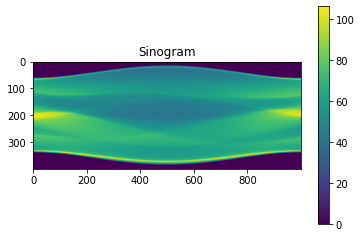

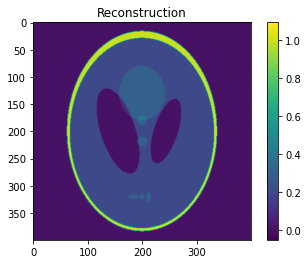

In [3]:
# setting
n_angles = 1000
image_size = image.shape[-1]

# get operators 
radon_op, fbp_op = radon.get_operators(n_angles=n_angles, image_size=image_size, circle=True, device=device)

# apply radon transformation
sino = radon_op(image)
plt.imshow(sino[0,0].cpu())
plt.colorbar()
plt.title("Sinogram")
plt.show()

# apply filtered backprojection
reconstructed = fbp_op(sino)
plt.imshow(reconstructed[0,0].cpu())
plt.colorbar()
plt.title("Reconstruction")
plt.show()